# NISQ Experiment

In [1]:
import sys
sys.path.insert(0, '../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix, random_unitary
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm

from loss_functions import *
from optimization import *
from quantum_channel import *
from quantum_tools import *
from experimental import *
from spam import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import random_unitary, Operator

In [ ]:
#qk.IBMQ.save_account("a9ec3c697bede976217e9ff6c5c0f19a2511ea34a225bbe10f0c74bda39de845d16fa3f7c30b47c5714e2b695aded3cfd474e7c1b33056014fab89301b83d724", overwrite=True) 
provider = qk.IBMQ.load_account()
provider = qk.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend("ibmq_belem")

#backend = AerSimulator()

In [6]:
def execute_and_collect(circuit_list, backend, file_name=None, shots=20000):
    N = len(circuit_list)
    num_batches = (N+500-1)//500
    circuit_batch_list = [circuit_list[500*i: 500*(i+1)] for i in range(num_batches)]
    counts_list = []
    for i, circuit_batch in enumerate(tqdm(circuit_batch_list)):
        num_parcels = (len(circuit_batch) + 100 - 1)//100
        circuit_parcel_list = [circuit_batch[100*j: 100*(j+1)] for j in range(num_parcels)]
        job_list = []
        
        for circuit_parcel in circuit_parcel_list:
            trans_circ_list = qk.transpile(circuit_parcel, 
                                           backend, 
                                           optimization_level = 0, 
                                           seed_transpiler=42, 
                                           scheduling_method = 'asap')
            
            job = backend.run(trans_circ_list, shots = shots)
            
            job_list.append(job)
        
        result_list = []
        for job in tqdm(job_list):
            result_list.append(job.result())
            
        for result, circuit_parcel in zip(result_list, circuit_parcel_list):
            counts_list.extend([result.get_counts(circuit) for circuit in circuit_parcel]) 
        
    return counts_list  

## Ring Disk Transition, Two Qubits

In [8]:
backend = provider.get_backend("ibmq_belem")

n = 2
d = 2**n

np.random.seed(42)
random.seed(42)

for i in range(10):
    circuit_target = pqc_basic(n, 8).reverse_bits()

    inputs_map, circuit_list_map = generate_pauli_circuits(n, circuit_target)
    inputs_spam, circuit_list_spam = generate_pauliInput_circuits(n)

    circuit_list = circuit_list_map + circuit_list_spam
    if i>=5:
        counts_list = execute_and_collect(circuit_list, backend, shots = 1000)
        data = [inputs_map, inputs_spam, counts_list]
        pickle.dump(data, open(f"../../data/twoQubits_PQC_noDelay_belem_{i}.p", "wb"))

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

In [9]:
backend = provider.get_backend("ibmq_belem")

n = 2
d = 2**n

np.random.seed(42)
random.seed(42)

for i in range(10):
    circuit_target = pqc_basic(n, 8).reverse_bits()
    circuit_target.delay(5, unit="us")

    inputs_map, circuit_list_map = generate_pauli_circuits(n, circuit_target)
    inputs_spam, circuit_list_spam = generate_pauliInput_circuits(n)

    circuit_list = circuit_list_map + circuit_list_spam
    if i>=5:
        counts_list = execute_and_collect(circuit_list, backend, shots = 1000)
        data = [inputs_map, inputs_spam, counts_list]
        pickle.dump(data, open(f"../../data/twoQubits_PQC_5usDelay_belem_{i}.p", "wb"))

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

In [10]:
backend = provider.get_backend("ibmq_belem")

n = 2
d = 2**n

np.random.seed(42)
random.seed(42)

for i in range(10):
    circuit_target = pqc_basic(n, 8).reverse_bits()
    circuit_target.delay(10, unit="us")

    inputs_map, circuit_list_map = generate_pauli_circuits(n, circuit_target)
    inputs_spam, circuit_list_spam = generate_pauliInput_circuits(n)

    circuit_list = circuit_list_map + circuit_list_spam
    if i>=5:
        counts_list = execute_and_collect(circuit_list, backend, shots = 1000)
        data = [inputs_map, inputs_spam, counts_list]
        pickle.dump(data, open(f"../../data/twoQubits_PQC_10usDelay_belem_{i}.p", "wb"))

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

In [11]:
backend = provider.get_backend("ibmq_belem")

n = 2
d = 2**n

np.random.seed(42)
random.seed(42)

for i in range(10):
    circuit_target = pqc_basic(n, 8).reverse_bits()
    circuit_target.delay(15, unit="us")

    inputs_map, circuit_list_map = generate_pauli_circuits(n, circuit_target)
    inputs_spam, circuit_list_spam = generate_pauliInput_circuits(n)

    circuit_list = circuit_list_map + circuit_list_spam
    if i>=5:
        counts_list = execute_and_collect(circuit_list, backend, shots = 1000)
        data = [inputs_map, inputs_spam, counts_list]
        pickle.dump(data, open(f"../../data/twoQubits_PQC_15usDelay_belem_{i}.p", "wb"))

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

In [12]:
backend = provider.get_backend("ibmq_belem")

n = 2
d = 2**n

np.random.seed(42)
random.seed(42)

for i in range(10):
    circuit_target = pqc_basic(n, 8).reverse_bits()
    circuit_target.delay(20, unit="us")

    inputs_map, circuit_list_map = generate_pauli_circuits(n, circuit_target)
    inputs_spam, circuit_list_spam = generate_pauliInput_circuits(n)

    circuit_list = circuit_list_map + circuit_list_spam
    if i>=5:
        counts_list = execute_and_collect(circuit_list, backend, shots = 1000)
        data = [inputs_map, inputs_spam, counts_list]
        pickle.dump(data, open(f"../../data/twoQubits_PQC_20usDelay_belem_{i}.p", "wb"))

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

In [13]:
backend = provider.get_backend("ibmq_belem")

n = 2
d = 2**n

np.random.seed(42)
random.seed(42)

for i in range(10):
    circuit_target = pqc_basic(n, 8).reverse_bits()
    circuit_target.delay(25, unit="us")

    inputs_map, circuit_list_map = generate_pauli_circuits(n, circuit_target)
    inputs_spam, circuit_list_spam = generate_pauliInput_circuits(n)

    circuit_list = circuit_list_map + circuit_list_spam
    if i>=5:
        counts_list = execute_and_collect(circuit_list, backend, shots = 1000)
        data = [inputs_map, inputs_spam, counts_list]
        pickle.dump(data, open(f"../../data/twoQubits_PQC_25Delay_belem_{i}.p", "wb"))

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

## Ring Disk Transition, Three Qubits

In [5]:
backend = provider.get_backend("ibmq_belem")

n = 3
d = 2**n

np.random.seed(42)
random.seed(42)

for i in range(5):
    circuit_target = pqc_basic(n, 8).reverse_bits()

    N = 2000 - 6**n
    inputs_map, circuit_list_map = generate_pauli_circuits(n, circuit_target, N)
    inputs_spam, circuit_list_spam = generate_pauliInput_circuits(n)

    circuit_list = circuit_list_map + circuit_list_spam

    counts_list = execute_and_collect(circuit_list, backend, shots = 1000)
    data = [inputs_map, inputs_spam, counts_list]
    pickle.dump(data, open(f"../../data/threeQubits_PQC_noDelay_belem_{i}.p", "wb"))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [6]:
backend = provider.get_backend("ibmq_belem")

n = 3
d = 2**n

np.random.seed(42)
random.seed(42)

for i in range(5):
    circuit_target = pqc_basic(n, 8).reverse_bits()
    circuit_target.delay(5, unit="us")

    N = 2000 - 6**n
    inputs_map, circuit_list_map = generate_pauli_circuits(n, circuit_target, N)
    inputs_spam, circuit_list_spam = generate_pauliInput_circuits(n)

    circuit_list = circuit_list_map + circuit_list_spam
    
    counts_list = execute_and_collect(circuit_list, backend, shots = 1000)
    data = [inputs_map, inputs_spam, counts_list]
    pickle.dump(data, open(f"../../data/threeQubits_PQC_5usDelay_belem_{i}.p", "wb"))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [7]:
backend = provider.get_backend("ibmq_belem")

n = 3
d = 2**n

np.random.seed(42)
random.seed(42)

for i in range(5):
    circuit_target = pqc_basic(n, 8).reverse_bits()
    circuit_target.delay(10, unit="us")

    N = 2000 - 6**n
    inputs_map, circuit_list_map = generate_pauli_circuits(n, circuit_target, N)
    inputs_spam, circuit_list_spam = generate_pauliInput_circuits(n)

    circuit_list = circuit_list_map + circuit_list_spam
    

    counts_list = execute_and_collect(circuit_list, backend, shots = 1000)
    data = [inputs_map, inputs_spam, counts_list]
    pickle.dump(data, open(f"../../data/threeQubits_PQC_10usDelay_belem_{i}.p", "wb"))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [8]:
backend = provider.get_backend("ibmq_belem")

n = 3
d = 2**n

np.random.seed(42)
random.seed(42)

for i in range(5):
    circuit_target = pqc_basic(n, 8).reverse_bits()
    circuit_target.delay(15, unit="us")

    N = 2000 - 6**n
    inputs_map, circuit_list_map = generate_pauli_circuits(n, circuit_target, N)
    inputs_spam, circuit_list_spam = generate_pauliInput_circuits(n)

    circuit_list = circuit_list_map + circuit_list_spam
    
    counts_list = execute_and_collect(circuit_list, backend, shots = 1000)
    data = [inputs_map, inputs_spam, counts_list]
    pickle.dump(data, open(f"../../data/threeQubits_PQC_15usDelay_belem_{i}.p", "wb"))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [6]:
backend = provider.get_backend("ibmq_belem")

n = 3
d = 2**n

np.random.seed(42)
random.seed(42)

for i in range(5):
    circuit_target = pqc_basic(n, 8).reverse_bits()
    circuit_target.delay(20, unit="us")

    N = 2000 - 6**n
    inputs_map, circuit_list_map = generate_pauli_circuits(n, circuit_target, N)
    inputs_spam, circuit_list_spam = generate_pauliInput_circuits(n)

    circuit_list = circuit_list_map + circuit_list_spam
    counts_list = execute_and_collect(circuit_list, backend, shots = 1000)
    data = [inputs_map, inputs_spam, counts_list]
    pickle.dump(data, open(f"../../data/threeQubits_PQC_20usDelay_belem_{i}_retry.p", "wb"))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [10]:
backend = provider.get_backend("ibmq_belem")

n = 3
d = 2**n

np.random.seed(42)
random.seed(42)

for i in range(5):
    circuit_target = pqc_basic(n, 8).reverse_bits()
    circuit_target.delay(25, unit="us")

    N = 2000 - 6**n
    inputs_map, circuit_list_map = generate_pauli_circuits(n, circuit_target, N)
    inputs_spam, circuit_list_spam = generate_pauliInput_circuits(n)

    circuit_list = circuit_list_map + circuit_list_spam
    if i>2:
        counts_list = execute_and_collect(circuit_list, backend, shots = 1000)
        data = [inputs_map, inputs_spam, counts_list]
        pickle.dump(data, open(f"../../data/threeQubits_PQC_25usDelay_belem_{i}.p", "wb"))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

## Ring Disk Transition, Four Qubits

In [14]:
backend = provider.get_backend("ibmq_belem")

n = 4

np.random.seed(42)
random.seed(42)

circuit_target = pqc_basic(n, 8).reverse_bits()

N_map = 5000
N_spam = 1000
inputs_map, circuit_list_map = generate_pauli_circuits(n, circuit_target, N_map)
inputs_spam, circuit_list_spam = generate_pauliInput_circuits(n, N_spam)

counts_list_spam = execute_and_collect(circuit_list_spam, backend, shots = 10000)
counts_list_map = execute_and_collect(circuit_list_map, backend, shots = 1000)
data = [inputs_map, inputs_spam, counts_list_spam, counts_list_map]
pickle.dump(data, open(f"../../data/fourQubits_PQC_noDelay_belem.p", "wb"))

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

## Entangling Pauli Strings

In [14]:
backend = provider.get_backend("ibmq_belem")

n = 3
d = 2**n

np.random.seed(42)
random.seed(42)
N = 2000 - 6**n

circuit_target = pqc_basic(n, 8).reverse_bits()

inputs_map, circuit_list_map = generate_pauli_circuits(n, circuit_target, N)
inputs_spam, circuit_list_spam = generate_pauliInput_circuits(n)
inputs_val, circuit_list_val = generate_pauli_circuits_entangled(n, circuit_target, N=500)

circuit_list = circuit_list_map + circuit_list_spam + circuit_list_val

counts_list = execute_and_collect(circuit_list, backend, shots = 1000)
data = [inputs_map, inputs_spam, inputs_val, counts_list]
pickle.dump(data, open("../../data/threeQubits_PQC_belem_entangled_pauli.p", "wb"))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

## Idling Gates

### No Delay

In [7]:
backend = provider.get_backend("ibmq_belem")

n = 3
d = 2**n

np.random.seed(42)
random.seed(42)
N = 2000 - 6**n

circuit_target = qk.QuantumCircuit(n)
#circuit_target.delay()

inputs_map, circuit_list_map = generate_pauli_circuits(n, circuit_target, N)
inputs_spam, circuit_list_spam = generate_pauliInput_circuits(n)
inputs_val, circuit_list_val = generate_pauli_circuits_entangled(n, circuit_target, N=500)

circuit_list = circuit_list_map + circuit_list_spam + circuit_list_val

counts_list = execute_and_collect(circuit_list, backend, shots = 1000)
data = [inputs_map, inputs_spam, inputs_val, counts_list]
pickle.dump(data, open("../../data/threeQubits_PQC_belem_iding_noDelay.p", "wb"))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [8]:
backend = provider.get_backend("ibmq_belem")

n = 3
d = 2**n

np.random.seed(42)
random.seed(42)
N = 2000 - 6**n

circuit_target = qk.QuantumCircuit(n)
circuit_target.delay(5, unit="us")

inputs_map, circuit_list_map = generate_pauli_circuits(n, circuit_target, N)
inputs_spam, circuit_list_spam = generate_pauliInput_circuits(n)
inputs_val, circuit_list_val = generate_pauli_circuits_entangled(n, circuit_target, N=500)

circuit_list = circuit_list_map + circuit_list_spam + circuit_list_val

counts_list = execute_and_collect(circuit_list, backend, shots = 1000)
data = [inputs_map, inputs_spam, inputs_val, counts_list]
pickle.dump(data, open("../../data/threeQubits_PQC_belem_iding_5usDelay.p", "wb"))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [9]:
backend = provider.get_backend("ibmq_belem")

n = 3
d = 2**n

np.random.seed(42)
random.seed(42)
N = 2000 - 6**n

circuit_target = qk.QuantumCircuit(n)
circuit_target.delay(10, unit="us")

inputs_map, circuit_list_map = generate_pauli_circuits(n, circuit_target, N)
inputs_spam, circuit_list_spam = generate_pauliInput_circuits(n)
inputs_val, circuit_list_val = generate_pauli_circuits_entangled(n, circuit_target, N=500)

circuit_list = circuit_list_map + circuit_list_spam + circuit_list_val

counts_list = execute_and_collect(circuit_list, backend, shots = 1000)
data = [inputs_map, inputs_spam, inputs_val, counts_list]
pickle.dump(data, open("../../data/threeQubits_PQC_belem_iding_10usDelay.p", "wb"))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [29]:
circuit_target = qk.QuantumCircuit(3,3)
circuit_target.rx(np.pi,0)
circuit_target.ry(-np.pi/2,1)
circuit_target.rx(np.pi/2,2)
circuit_target.barrier()
circuit_target = circuit_target.compose(pqc_basic(3, 2))
circuit_target.delay(5, unit="us")

circuit_target.barrier()
circuit_target.i(0)
circuit_target.ry(-np.pi/2,1)
circuit_target.rx(np.pi,2)
circuit_target.measure(0,0)
circuit_target.measure(1,1)
circuit_target.measure(2,2)

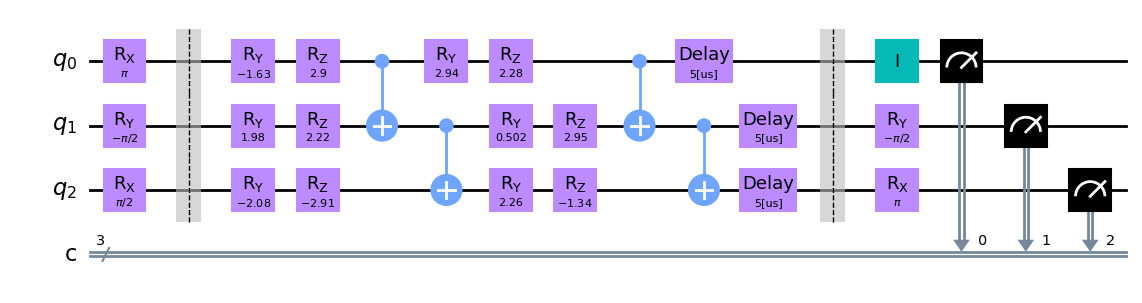

In [30]:
circuit_target.draw("mpl")

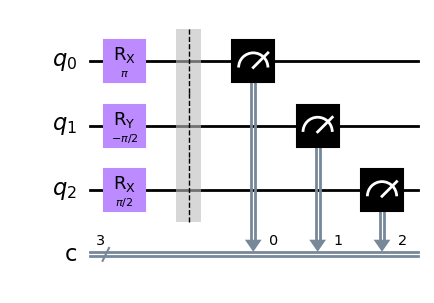

In [31]:
circuit_target = qk.QuantumCircuit(3,3)
circuit_target.rx(np.pi,0)
circuit_target.ry(-np.pi/2,1)
circuit_target.rx(np.pi/2,2)
circuit_target.barrier()
circuit_target.measure(0,0)
circuit_target.measure(1,1)
circuit_target.measure(2,2)

circuit_target.draw("mpl")

## Quantum Sausage